In [1]:
!pip install fsspec
!pip install gcsfs

     |████████████████████████████████| 132 kB 806 kB/s            
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.2.0
    Uninstalling fsspec-2022.2.0:
      Successfully uninstalled fsspec-2022.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
s3fs 2022.2.0 requires fsspec==2022.02.0, but you have fsspec 2021.11.1 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.


In [2]:
!pip install transformers

In [3]:
!pip install datasets

In [4]:
import pandas as pd
# df_mini = pd.read_csv('../input/aideas/texto_limpio.csv', index_col = 'Unnamed: 0')
df_mini = pd.read_csv("gs://tfm_aideas_datasets/texto_limpio_3labels.csv", index_col = 'Unnamed: 0')
# df_mini = pd.read_csv('/content/drive/My Drive/Colab Notebooks/texto_limpio_3labels.csv', index_col = 'Unnamed: 0')

# import pickle
# consolidated = pickle.load(open("../input/aideas/translation.pkl", "rb" ))

from sklearn.utils import shuffle
dataset = shuffle(df_mini, random_state=42).reset_index(drop=True)
dataset

,ticker,date,body,r_adj,label,texto_limpio
0,ELE,2021-03-02 20:50:00.000,"MADRID, 2 Mar. (EUROPA PRESS) - El pívot del R...",-0.021237,-1,2 pívot real madrid walter tavares sido nombra...
1,REE,2021-11-23 13:16:00.000,"NERJA (MÁLAGA), 23 Nov. (EUROPA PRESS) - La de...",0.000124,0,nerja 23 delegada territorial educación deport...
2,SAN,2021-02-05 13:55:00.000,"MADRID, 5 Feb. (EUROPA PRESS) - El fondo austr...",0.019216,1,5 fondo australiano ifm presentado viernes com...
3,BKT,2021-03-13 09:06:12.000,Los bancos españoles han comenzado el año en B...,-0.015562,-1,bancos españoles comenzado año bolsa buen expe...
4,SAN,2021-12-18 09:29:00.000,"MADRID, 18 Dic. (EUROPA PRESS) - Rami Aboukhai...",0.004396,0,18 rami ahora director negocio tarjetas grupo ...
...,...,...,...,...,...,...
53510,IAG,2021-03-05 06:09:36.000,El derrumbe de la movilidad y el miedo a los c...,-0.042987,-1,derrumbe movilidad miedo costes fijos incremen...
53511,TEF,2021-10-11 20:08:31.000,Los fiscales austriacos investigan si miembros...,0.007495,0,fiscales austriacos investigan si miembros övp...
53512,FER,2021-09-27 18:26:00.000,"MADRID, 27 Sep. (EUROPA PRESS) - El ministro d...",-0.007847,0,27 ministro asuntos ue josé manuel asegurado l...
53513,SAB,2021-01-25 10:31:00.000,"MADRID, 25 Ene. (EUROPA PRESS) - Asufin ha den...",0.016134,1,25 asufin denunciado banco españa comisión nac...


In [5]:
# import pandas as pd
# df_mini = pd.read_csv('../texto_limpio.csv', index_col = 'Unnamed: 0')

# import pickle
# consolidated = pickle.load(open("../translation.pkl", "rb" ))

# from sklearn.utils import shuffle
# dataset = shuffle(df_mini, random_state=42).reset_index(drop=True)
# dataset

# Transfer Learning con FinBERT

A continuación se reentrena la última capa únicamente de FinBERT para la clasificación de las labels del dataset de noticias y alpha.

In [6]:
# dataset.label = dataset.label.replace({-1:0})
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset.label = lb.fit_transform(dataset.label)

In [7]:
import numpy as np
np.unique(dataset.label)
#-1 -> 0
#0 -> 1
#1 -> 2

array([0, 1, 2])

In [8]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
import numpy as np

checkpoint = "dccuchile/bert-base-spanish-wwm-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/310 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/650 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/475k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134 [00:00<?, ?B/s]

In [9]:
from transformers import AutoModelForSequenceClassification, AutoConfig
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adam
from transformers import AutoTokenizer, TFBertForSequenceClassification

model = TFBertForSequenceClassification.from_pretrained(checkpoint, num_labels=3)
# model = TFBertForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
# config = AutoConfig.from_pretrained("ProsusAI/finbert")
# config.num_labels = 2
# model = TFAutoModelForSequenceClassification.from_config(config)


Downloading:   0%|          | 0.00/512M [00:00<?, ?B/s]

2022-04-05 09:05:51.749337: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 09:05:51.750572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 09:05:51.751258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 09:05:51.752116: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
# from transformers import AutoModelForSequenceClassification, AutoConfig
# import tensorflow as tf
# import keras
# from tensorflow.keras.optimizers import Adam
# from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# # model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert", num_labels=2)
# config = AutoConfig.from_pretrained("ProsusAI/finbert")
# config.num_labels = 2
# model = TFAutoModelForSequenceClassification.from_config(config)


In [11]:
# tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
# tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# model = TFAutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert", from_pt=True, num_labels=1)

In [12]:
# import numpy as np
# proba_matrix = np.array(proba)
# dataset_preds["Finbert_TL_2label"] = proba_matrix.argmax(axis=1)

In [13]:
model.layers[0].trainable=False
# model.layers[-1].activation=keras.activations.softmax

In [14]:
model.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer=Adam(learning_rate=0.0001),
metrics=['accuracy']
)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset.body, dataset.label, test_size=0.2, random_state=42)

In [16]:
# tokenized_datasets = tokenizer(dataset.body.tolist()[:5], padding=True, truncation=True, return_tensors="tf")
x_train = tokenizer(x_train.tolist(), padding="max_length", truncation=True, return_tensors="tf")

In [17]:
x_test = tokenizer(x_test.tolist(), padding="max_length", truncation=True, return_tensors="tf")

In [18]:
# tokens_w_labels = x_train.copy()

# train_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(tokens_w_labels),
#     y_train.values[:5]
# ))

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = './checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

hist = model.fit(
    dict(x_train),
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.1,
    callbacks=[model_checkpoint_callback]
    )

2022-04-05 09:07:37.249939: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
302/302 [==============================] - 997s 3s/step - loss: 0.9545 - accuracy: 0.5970 - val_loss: 0.9339 - val_accuracy: 0.6065
Epoch 2/20
302/302 [==============================] - 979s 3s/step - loss: 0.9435 - accuracy: 0.6008 - val_loss: 0.9323 - val_accuracy: 0.6065
Epoch 3/20
302/302 [==============================] - 978s 3s/step - loss: 0.9422 - accuracy: 0.6008 - val_loss: 0.9311 - val_accuracy: 0.6065
Epoch 4/20
302/302 [==============================] - 978s 3s/step - loss: 0.9411 - accuracy: 0.6009 - val_loss: 0.9315 - val_accuracy: 0.6065
Epoch 5/20
302/302 [==============================] - 978s 3s/step - loss: 0.9406 - accuracy: 0.6010 - val_loss: 0.9310 - val_accuracy: 0.6065
Epoch 6/20
302/302 [==============================] - 978s 3s/step - loss: 0.9406 - accuracy: 0.6008 - val_loss: 0.9301 - val_accuracy: 0.6067
Epoch 7/20
302/302 [==============================] - 979s 3s/step - loss: 0.9394 - accuracy: 0.6011 - val_loss: 0.9303 - val_accuracy: 0.6065

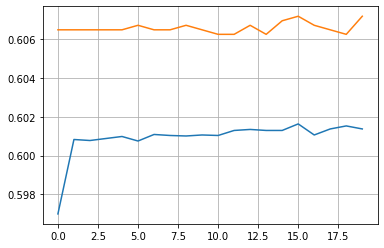

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.grid()
plt.show()

In [21]:
model.load_weights(filepath)
model.evaluate(x_test.data, y_test)

335/335 [==============================] - 222s 664ms/step - loss: 0.9431 - accuracy: 0.5999


[0.9430974125862122, 0.5999252796173096]

In [22]:
y_pred = model.predict(x_test.data)

In [23]:
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             roc_auc_score, precision_score)

In [24]:
y_pred = y_pred.logits.argmax(axis=1)

In [25]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2150
           1       0.60      1.00      0.75      6427
           2       0.27      0.00      0.01      2126

    accuracy                           0.60     10703
   macro avg       0.29      0.33      0.25     10703
weighted avg       0.41      0.60      0.45     10703



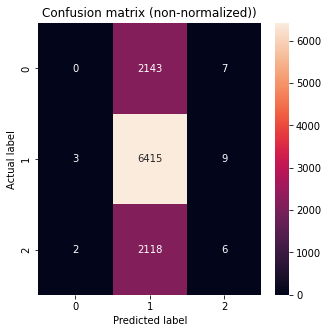

In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion matrix (non-normalized))")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")


plot_cm(y_test, y_pred)